# Handling Imbalance data 

When one Class/ Feature has more sample data 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('D:/Btech_CS/Python/EDA/diabetes_data/diabetic_data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [5]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [6]:
print(df['readmitted'].value_counts())

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64


In [7]:
from collections import Counter


# 1. Random Under Sampling (RUS)

In [8]:
from imblearn.under_sampling import RandomUnderSampler

In [9]:
def plot_class_distribution(y_old, y_new, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    fig.suptitle(title, fontsize=16)

    sns.countplot(x=y_old, ax=ax1)
    ax1.set_title('Original Distribution')
    ax1.set_xlabel('Readmission Category')
    ax1.set_ylabel('Count')
    ax1.set_xticks(ticks=[0, 1], labels=['NO / >30 days', '<30 days'])
    
    sns.countplot(x=y_new, ax=ax2)
    ax2.set_title('Resampled Distribution')
    ax2.set_xlabel('Readmission Category')
    ax2.set_ylabel('Count')
    ax2.set_xticks(ticks=[0, 1], labels=['NO / >30 days', '<30 days'])
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

In [11]:
# RUS

X = df.drop(columns=['readmitted', 'encounter_id', 'patient_nbr'])
y = df['readmitted']

X  = pd.get_dummies(X)

rus = RandomUnderSampler(sampling_strategy='not majority', random_state=1)
rus_majority = RandomUnderSampler(sampling_strategy='majority', random_state=1)
rus_all = RandomUnderSampler(sampling_strategy='all', random_state=1)

# sampling_strategy
# "majority" --> resample the majority class only
# "minority" --> resample the minority class only
# "not minority" --> resample all classes except the minority
# "not majority" --> resample all classes except the majority
# "all" --> resample all classes

X_rus, y_rus = rus.fit_resample(X, y)
X_rus_maj, y_rus_maj = rus_majority.fit_resample(X, y)
X_rus_all, y_rus_all = rus_all.fit_resample(X, y)

print("Original distribution:", Counter(y))
print("Under-sampling distribution (not majority):", Counter(y_rus))
print("Under-sampling distribution (majority):", Counter(y_rus_maj))
print("Under-sampling distribution (all):", Counter(y_rus_all))

Original distribution: Counter({'NO': 54864, '>30': 35545, '<30': 11357})
Under-sampling distribution (not majority): Counter({'NO': 54864, '<30': 11357, '>30': 11357})
Under-sampling distribution (majority): Counter({'>30': 35545, '<30': 11357, 'NO': 11357})
Under-sampling distribution (all): Counter({'<30': 11357, '>30': 11357, 'NO': 11357})


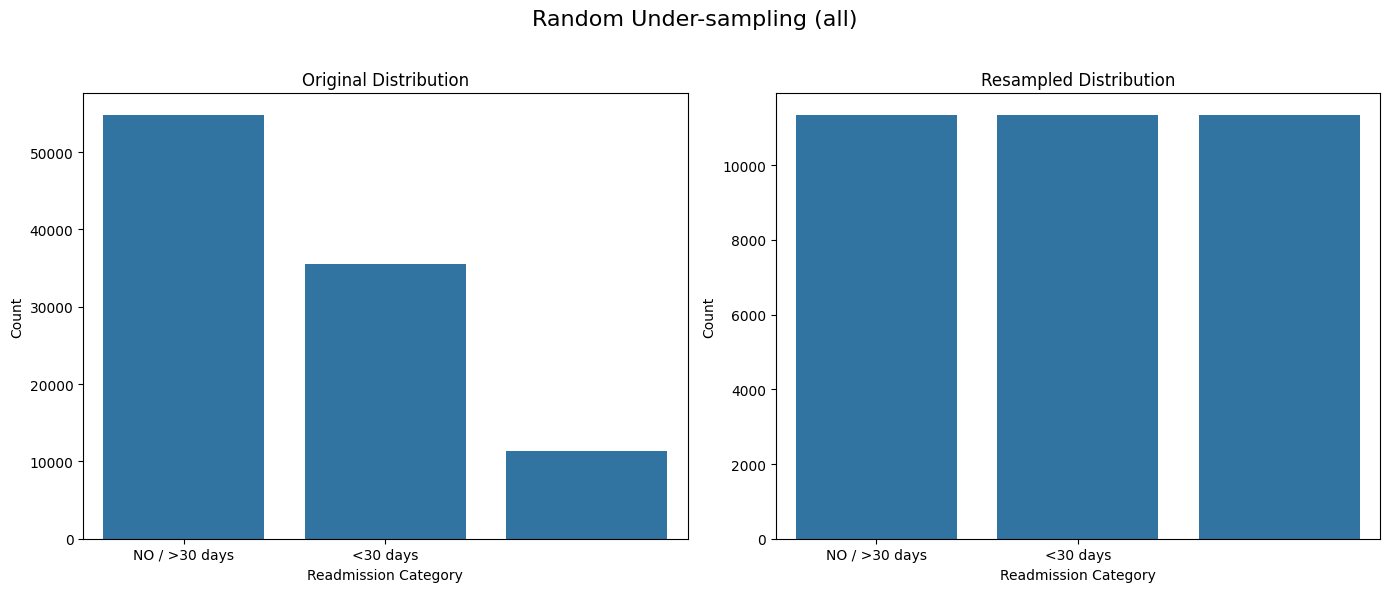

In [12]:
plot_class_distribution(y, y_rus_all, "Random Under-sampling (all)")

# 2. Random Over Sampling (RUS)

Original distribution: Counter({'NO': 54864, '>30': 35545, '<30': 11357})
Over-sampling distribution: Counter({'NO': 54864, '>30': 54864, '<30': 54864})


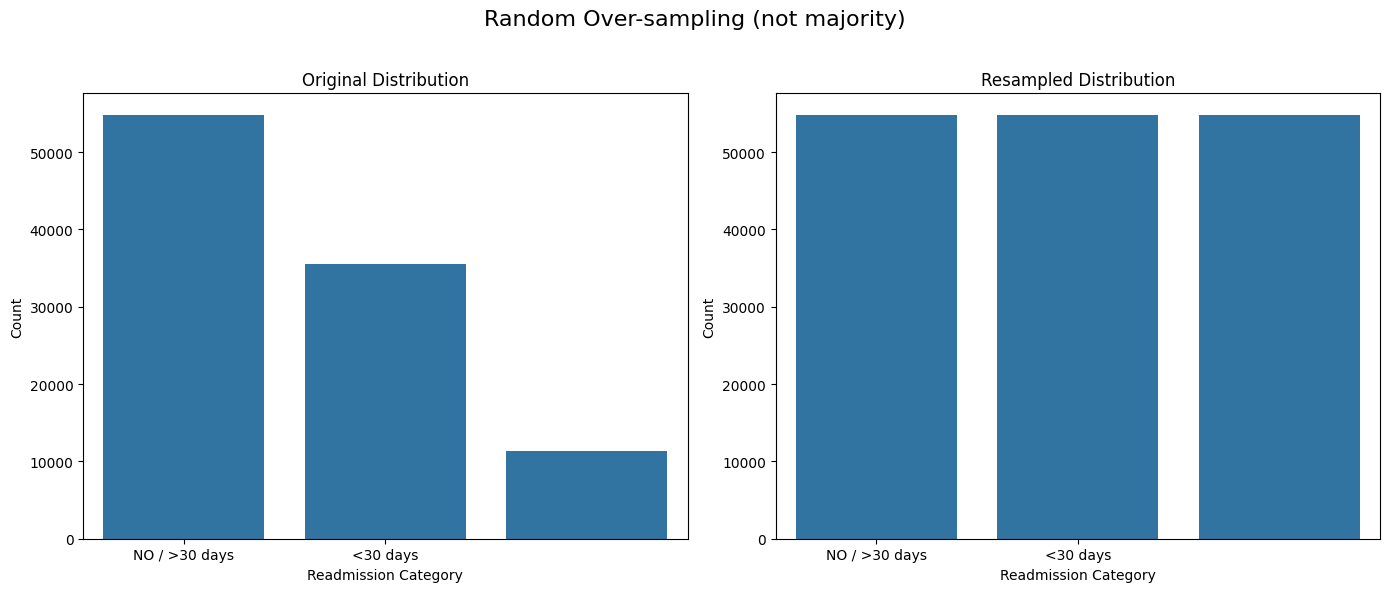

In [14]:
# Random Over-sampling

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy='not majority', random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)
print("Original distribution:", Counter(y))
print("Over-sampling distribution:", Counter(y_ros))
plot_class_distribution(y, y_ros, "Random Over-sampling (not majority)")

# 3. Synthetic Minority Oversamapling Technique (SMOT)

In [15]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='not majority', random_state=42)
X_sm, y_sm = smote.fit_resample(X, y)
print("Original distribution:", Counter(y))
print("SMOTE distribution:", Counter(y_sm))
plot_class_distribution(y, y_sm, "SMOTE (not majority)")

KeyboardInterrupt: 

# 4. Adaptive Synthetic Sampling (ADASYN)

In [ ]:
# ADASYN
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(sampling_strategy='not majority', random_state=42)
X_asyn, y_asyn = adasyn.fit_resample(X, y)
print("Original distribution:", Counter(y))
print("ADASYN distribution:", Counter(y_asyn))
plot_class_distribution(y, y_asyn, "ADASYN (not majority)")